In [1]:
## Abstractions
import numpy as np
import pandas as pd

## Plotting
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import pylab as pl

## Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Models
from sklearn.linear_model import LogisticRegression

## Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

## Timing
import time

# Model
from MAPEstimator import MAPEstimator

Import Data

In [2]:
headers = ['molecule_name', 'conformation_name']
for i in range(1, 167):
    name = 'f%i' % i
    headers.append(name)
headers.append('class')

In [3]:
# headers = pd.read_csv('clean2.info')
df = pd.read_csv('src/clean2.data')
df.columns = headers

In [4]:
X = np.asarray(df.iloc[:,2:-1])
y = np.asarray(df.iloc[:,-1])

Standard Scaler

In [5]:
X_std = StandardScaler().fit_transform(X)

Train and Test Model

In [6]:
clf = MAPEstimator(w_D = np.zeros(X.shape[1]), step_size=0.1, alpha=0.1, max_iter = 10000000)
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [7]:
score = clf.score(X_std, y)
score

0.6296801576474155

In [8]:
(np.sum(y==0)) / len(y)

0.8459906017886918

In [10]:
clf.iteration_count

1700000

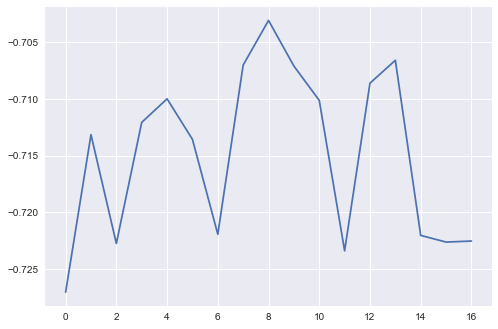

In [11]:
plt.plot(clf.loss_array)

In [17]:
clf = MAPEstimator(w_D = np.zeros(X.shape[1]), step_size=0.1, alpha=0.1, max_iter = 10000000, step_size_type = 'differential')
clf.fit(X_std,y)
predict_y = clf.predict_proba(X_std)

In [18]:
score = clf.score(X_std, y)
score

0.6396847051690162

In [19]:
(np.sum(y==0)) / len(y)

0.8459906017886918

In [20]:
clf.iteration_count

300000

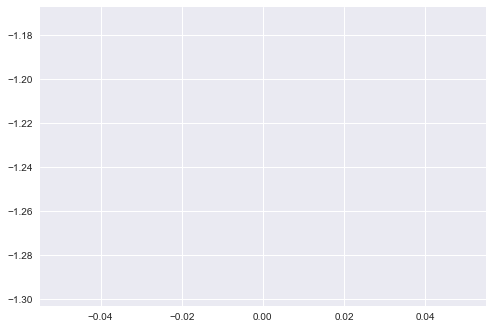

In [21]:
plt.plot(clf.loss_array)

Model Evaluation

In [6]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

10

In [7]:
iteration_counts = []
test_scores = []

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(X.shape[1]), step_size=0.1, alpha=0.1, max_iter = 10000000)
    clf.fit(X_train,y_train)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test)
    test_scores.append(score)
    

In [8]:
test_scores

[0.6181818181818182,
 0.5409090909090909,
 0.6151515151515151,
 0.6439393939393939,
 0.5772727272727273,
 0.6,
 0.5590909090909091,
 0.575113808801214,
 0.6236722306525038,
 0.6585735963581184]

In [9]:
iteration_counts

[470000,
 2986000,
 155000,
 150000,
 1942000,
 4821000,
 352000,
 507000,
 1327000,
 260000]

In [10]:
basic_test_scores = test_scores

In [11]:
basic_iteration_counts = iteration_counts

In [12]:
np.mean(basic_test_scores)

0.6011905090357291

In [13]:
np.mean(basic_iteration_counts)

1297000.0

In [14]:
kf = KFold(n_splits=10, shuffle = True, random_state = 136)
kf.get_n_splits(X_std, y)

10

In [15]:
iteration_counts = []
test_scores = []

for train_index, test_index in kf.split(X_std, y):
    X_train, X_test = X_std[train_index], X_std[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = MAPEstimator(w_D = np.zeros(X.shape[1]), step_size=0.1, alpha=0.1, max_iter = 10000000, step_size_type = 'differential')
    clf.fit(X_train,y_train)
    iteration_counts.append(clf.iteration_count)
    score = clf.score(X_test, y_test)
    test_scores.append(score)
    

/Users/nathanieldavis/Documents/tufts/2022spring/cs136/project/cs136_final_project/Checkpoint 2/MAPEstimator.py:141: RuntimeWarning: divide by zero encountered in log
  L = train_y[example_num] * np.log(sig) + (1-train_y[example_num]) * np.log(1-sig)
/Users/nathanieldavis/Documents/tufts/2022spring/cs136/project/cs136_final_project/Checkpoint 2/MAPEstimator.py:141: RuntimeWarning: invalid value encountered in double_scalars
  L = train_y[example_num] * np.log(sig) + (1-train_y[example_num]) * np.log(1-sig)


In [16]:
test_scores

[0.6393939393939394,
 0.6287878787878788,
 0.6272727272727273,
 0.696969696969697,
 0.6681818181818182,
 0.6106060606060606,
 0.5015151515151515,
 0.5386949924127465,
 0.5766312594840668,
 0.6176024279210925]

In [17]:
iteration_counts

[273000,
 889000,
 1997000,
 272000,
 301000,
 411000,
 1267000,
 2137000,
 434000,
 751000]

In [18]:
differential_test_scores = test_scores

In [19]:
differential_iteration_counts = iteration_counts

In [20]:
np.mean(differential_test_scores)

0.6105655952545179

In [21]:
np.mean(differential_iteration_counts)

873200.0

In [22]:
plot_test_scores = np.array([np.mean(basic_test_scores),np.mean(differential_test_scores)])

In [23]:
plot_iteration_counts = np.array([np.mean(basic_iteration_counts), np.mean(differential_iteration_counts)])

In [24]:
plot_test_scores = np.array([basic_test_scores, differential_test_scores])

In [25]:
plot_iteration_counts = np.array([basic_iteration_counts, differential_iteration_counts])

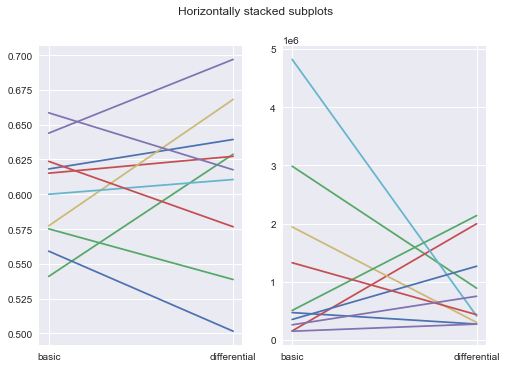

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(['basic','differential'],plot_test_scores)
ax2.plot(['basic','differential'], plot_iteration_counts)

Text(0, 0.5, 'Accuracy Rate on Held-out Data')

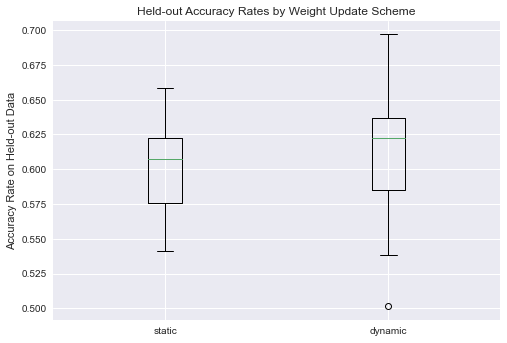

In [35]:
plt.boxplot(np.transpose(plot_test_scores), labels = ['static', 'dynamic'])
plt.title('Held-out Accuracy Rates by Weight Update Scheme')
plt.ylabel('Accuracy Rate on Held-out Data')

Text(0, 0.5, 'Number of Iterations until Convergence (Millions)')

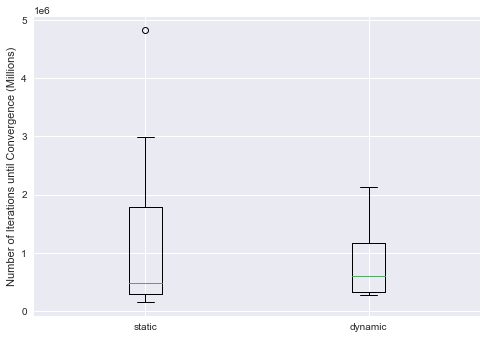

In [36]:
plt.boxplot(np.transpose(plot_iteration_counts), labels = ['static', 'dynamic'])
plt.ylabel('Number of Iterations until Convergence (Millions)')

In [51]:
plot_test_scores

array([[0.61818182, 0.63787879, 0.61515152, 0.64393939, 0.59848485,
        0.5530303 , 0.55909091, 0.57511381, 0.53717754, 0.6585736 ],
       [0.63939394, 0.62878788, 0.63484848, 0.6969697 , 0.66818182,
        0.61060606, 0.65151515, 0.61001517, 0.57663126, 0.61760243]])

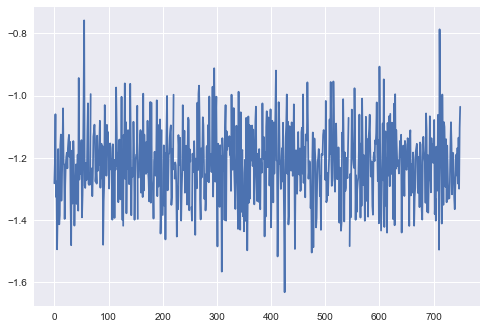

In [39]:
plt.plot(clf.loss_array)